<a href="https://colab.research.google.com/github/Passonileticia/Analise_ecommerce/blob/main/RID176824_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 05 - DNC
# Analise e modelagem dos dados de um E-commerce
## Leitura de dados e analises com integração a base de dados e importação de biblioteca.

1. Coluna - Descrição
2. CustomerID - Código de identificação do cliente
3. Description - Descrição do produto
4. InvoiceNo - Código da fatura
5. StockCode - Código de estoque do produto
6. Quantity - Quantidade do produto
7. InvoiceDate - Data do faturamento (compra)
8. UnitPrice - Preço unitário do produto
9. Country - País da compra

In [213]:
!pip install sidetable
!pip install ydata-profiling

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sidetable
from ydata_profiling import ProfileReport
import missingno as msno
from ipywidgets import interact, widgets
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform



In [215]:
dados = pd.read_csv('/content/data.csv', encoding='latin1')

In [216]:
#Verificação e analise de dados
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [217]:
#identificando a descrição dos dados
dados.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [218]:
#faz uma varredura de todos os dados
# dados.profile_report()

In [219]:
# Identificando as informacoes dos dados, fator importante para verificação de colunas com valores e dos tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [220]:
#identificar e mostrar valores nulos -> no sum ele soma qauntidade de valores nulos para aquela coluna
dados_ok = (
    dados.isna().sum()
    .to_frame('n_nulos')
    .join((dados.isna().sum() / dados.shape[0] * 100).to_frame('porcentagem_faltante'))
    .sort_values(by='n_nulos', ascending=False)
)

dados_ok.style.format('{:.2%}', subset=['porcentagem_faltante'])

,n_nulos,porcentagem_faltante
CustomerID,135080,2492.67%
Description,1454,26.83%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [221]:
#Percentual de dados nulos em relação a quantidade de linhas
dados.isna().sum() / dados.shape[0] * 100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [222]:
#dados sobre valor faltante por coluna
dados.isna().any()


,0
InvoiceNo,False
StockCode,False
Description,True
Quantity,False
InvoiceDate,False
UnitPrice,False
CustomerID,True
Country,False


In [223]:
#dados de valor faltante por linha
dados[dados.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [224]:
#verificação de valores nulos e a soma deles, dando clareza para saber quais colunas possui maior quantidade de dados faltando
dados_nulos = dados.isna().sum()
print(dados_nulos)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [225]:
#retirada de dados nulos
nao_nulo = dados.dropna()


In [226]:
nao_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [227]:
nao_nulo.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [228]:
# Verificar valores nulos ou menores que zero na coluna Unitprice
filtro_precos = (nao_nulo['UnitPrice'].isna()) | (nao_nulo['UnitPrice'] <= 0)
dados_precos_invalidos = nao_nulo[filtro_precos]
print("Dados nulos ou menor que zero na coluna de preços (UnitPrice):")
print(dados_precos_invalidos)

Dados nulos ou menor que zero na coluna de preços (UnitPrice):
       InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553

In [229]:
# Filtrar o dataset para conter apenas preços acima de zero
nao_nulo = nao_nulo[nao_nulo['UnitPrice'] > 0]
print("\nDados filtrados (preços acima de zero na coluna Unitprice):")
print(nao_nulo.head())


Dados filtrados (preços acima de zero na coluna Unitprice):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [230]:
# Verificar valores nulos ou menores que zero na coluna Quantity
filtro_quantidade = (nao_nulo['Quantity'].isna()) | (nao_nulo['Quantity'] <= 0)
dados_quantidade_invalidos = nao_nulo[filtro_quantidade]
print("\nDados nulos ou menor que zero na coluna de quantidade (Quantity):")
print(dados_quantidade_invalidos)


Dados nulos ou menor que zero na coluna de quantidade (Quantity):
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  Customer

In [231]:
# Filtrar o dataset para conter apenas quantidades acima de zero
nao_nulo = nao_nulo[nao_nulo['Quantity'] > 0]
print("\nDados filtrados (quantidade acima de zero na coluna Quantity):")
print(nao_nulo.head())


Dados filtrados (quantidade acima de zero na coluna Quantity):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [232]:
nao_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [233]:
nao_nulo.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [234]:
#identificação de valores duplicados
nao_nulo[nao_nulo.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [235]:
linhas_duplicadas = nao_nulo.duplicated()
print("Linhas duplicadas (True indica que a linha é duplicada):")
print(linhas_duplicadas)

Linhas duplicadas (True indica que a linha é duplicada):
0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397884, dtype: bool


In [236]:
nao_nulo_sem_duplicatas = nao_nulo.drop_duplicates()
print("\nDados sem linhas duplicadas:")
print(nao_nulo_sem_duplicatas.head())


Dados sem linhas duplicadas:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [237]:
nao_nulo_sem_duplicatas.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [238]:
nao_nulo_sem_duplicatas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [239]:
print(nao_nulo_sem_duplicatas['CustomerID'].dtype)

float64


In [240]:
nao_nulo_sem_duplicatas['CustomerID'] = nao_nulo_sem_duplicatas['CustomerID'].astype(int)

<ipython-input-240-d1f76607af7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_nulo_sem_duplicatas['CustomerID'] = nao_nulo_sem_duplicatas['CustomerID'].astype(int)


In [241]:
print(nao_nulo_sem_duplicatas['InvoiceDate'].dtype)

object


In [242]:
nao_nulo_sem_duplicatas['InvoiceDate'] = pd.to_datetime(nao_nulo_sem_duplicatas['InvoiceDate'])

<ipython-input-242-fb0d97e89d6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_nulo_sem_duplicatas['InvoiceDate'] = pd.to_datetime(nao_nulo_sem_duplicatas['InvoiceDate'])


In [243]:
nao_nulo_sem_duplicatas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


# Etapa 06
## Tratando Outliers -> que é o tratamento de valores que fogem muito do centro de distruibuição

usa muito média e desvio padrão, por isso em alguns casos os Outliers podem causar problemas

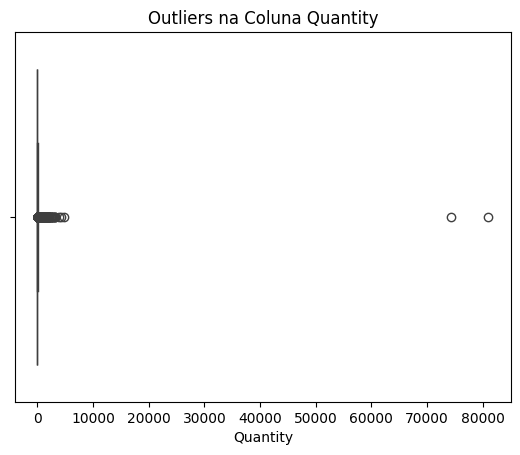

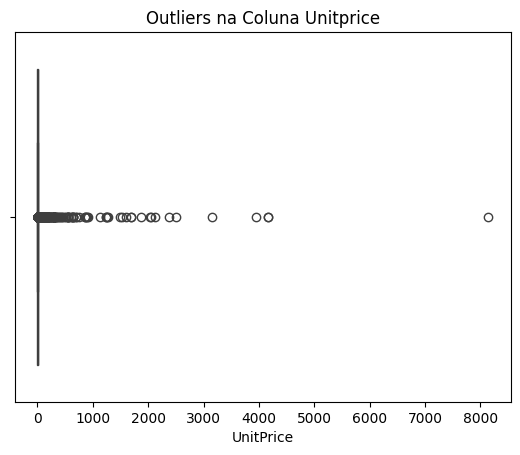

In [244]:
# Visualizar outliers na coluna Quantity
sns.boxplot(x=nao_nulo_sem_duplicatas['Quantity'])
plt.title('Outliers na Coluna Quantity')
plt.show()

# Visualizar outliers na coluna Unitprice
sns.boxplot(x=nao_nulo_sem_duplicatas['UnitPrice'])
plt.title('Outliers na Coluna Unitprice')
plt.show()

In [245]:
# Remover observações onde a quantidade do item na compra é superior a 10.000
nao_nulo_sem_duplicatas = nao_nulo_sem_duplicatas[nao_nulo_sem_duplicatas['Quantity'] <= 10000]

In [246]:
# Remover observações onde o preço unitário é maior que 5.000
nao_nulo_sem_duplicatas = nao_nulo_sem_duplicatas[nao_nulo_sem_duplicatas['UnitPrice'] <= 5000]

In [247]:
nao_nulo_sem_duplicatas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392689 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


# Etapa 07
## Criação de um nova para o preço total da compra ( Quantity * UnitPrice)

In [248]:
# Adicionar a nova coluna preco_total
nao_nulo_sem_duplicatas['preco_total'] = nao_nulo_sem_duplicatas['Quantity'] * nao_nulo_sem_duplicatas['UnitPrice']

In [249]:
nao_nulo_sem_duplicatas.head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,preco_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [250]:
nao_nulo_sem_duplicatas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392689 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   preco_total  392689 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


# Etapa 08
## Usando a Função max()


In [251]:
# Calcular a data da última compra no dataset
data_ultima_compra = nao_nulo_sem_duplicatas['InvoiceDate'].max()

In [252]:
print("Data da última compra no dataset:")
print(data_ultima_compra)

Data da última compra no dataset:
2011-12-09 12:50:00


# Etapa 09
## Plotando Gráficos

In [253]:
# Agrupar por Country e somar o valor total das vendas (preco_total)
vendas_por_pais = nao_nulo_sem_duplicatas.groupby('Country')['preco_total'].sum().reset_index()

In [254]:
# Ordenar os países pelo valor total de vendas em ordem decrescente
vendas_por_pais = vendas_por_pais.sort_values(by='preco_total', ascending=False)

In [255]:
# Selecionar os 10 países com maior valor de vendas
top_10_paises = vendas_por_pais.head(10)

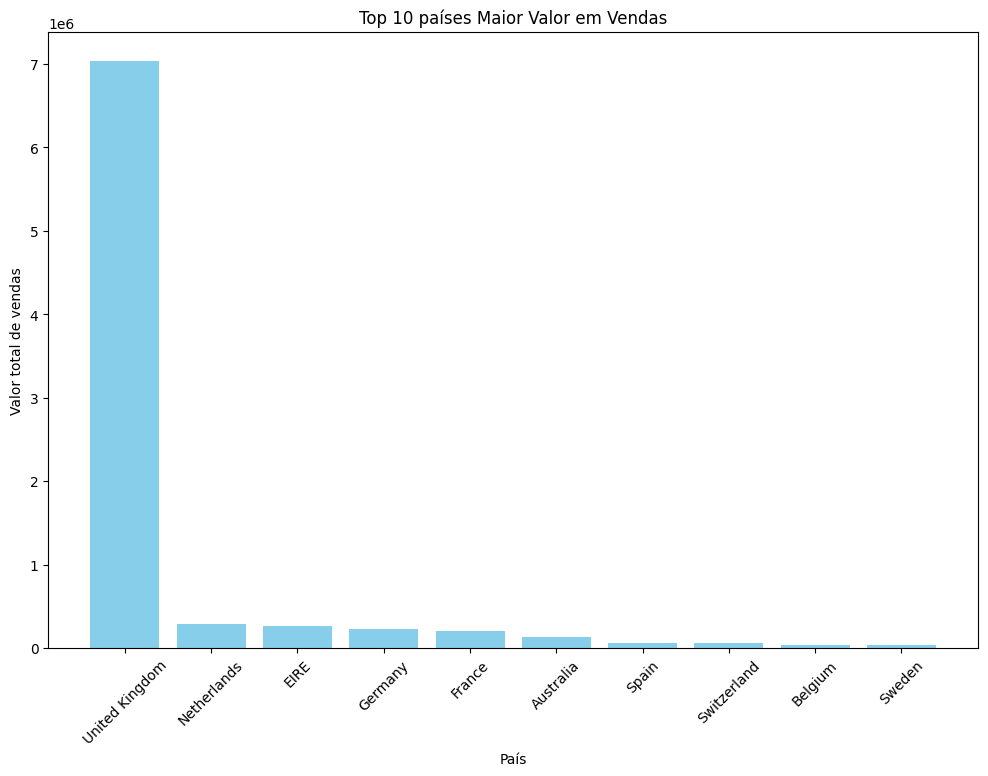

In [256]:
# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_10_paises['Country'], top_10_paises['preco_total'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Valor total de vendas')
plt.title('Top 10 países Maior Valor em Vendas')
plt.xticks(rotation=45)
plt.show()

In [257]:
# Agrupar por StockCode e somar a quantidade vendida
vendas_por_produto = nao_nulo_sem_duplicatas.groupby('StockCode')['Quantity'].sum().reset_index()

In [258]:
# Ordenar os produtos pela quantidade vendida em ordem decrescente
vendas_por_produto = vendas_por_produto.sort_values(by='Quantity', ascending=False)

In [259]:
# Selecionar os 10 produtos mais vendidos
top_10_produtos = vendas_por_produto.head(10)

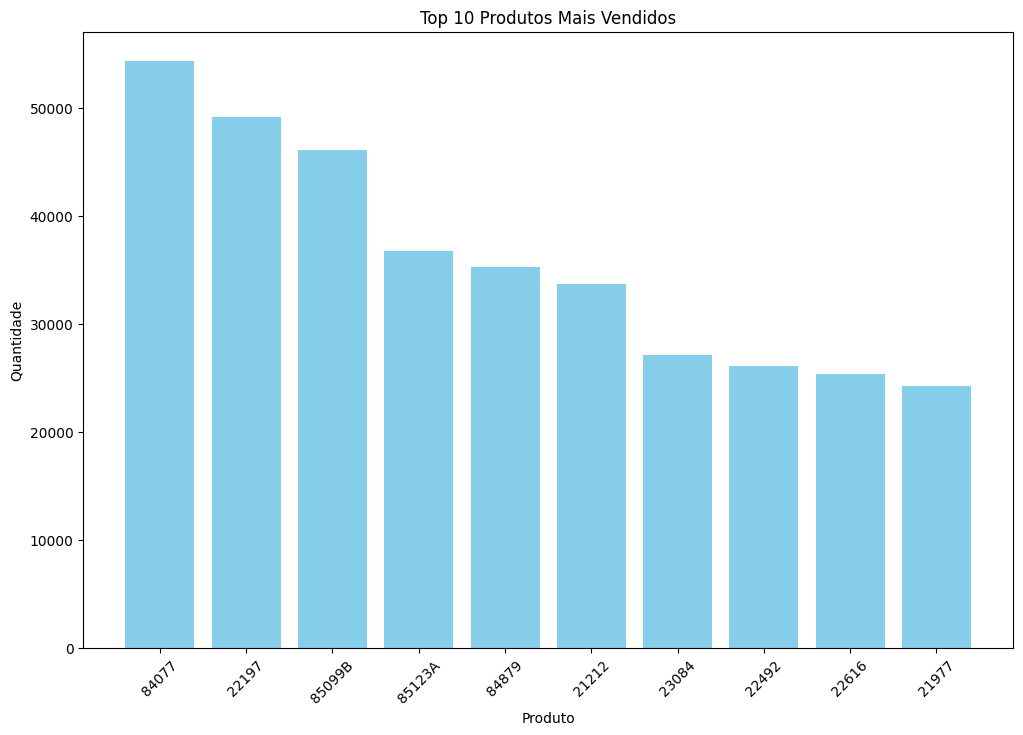

In [260]:
# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_10_produtos['StockCode'], top_10_produtos['Quantity'], color='skyblue')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45)
plt.show()

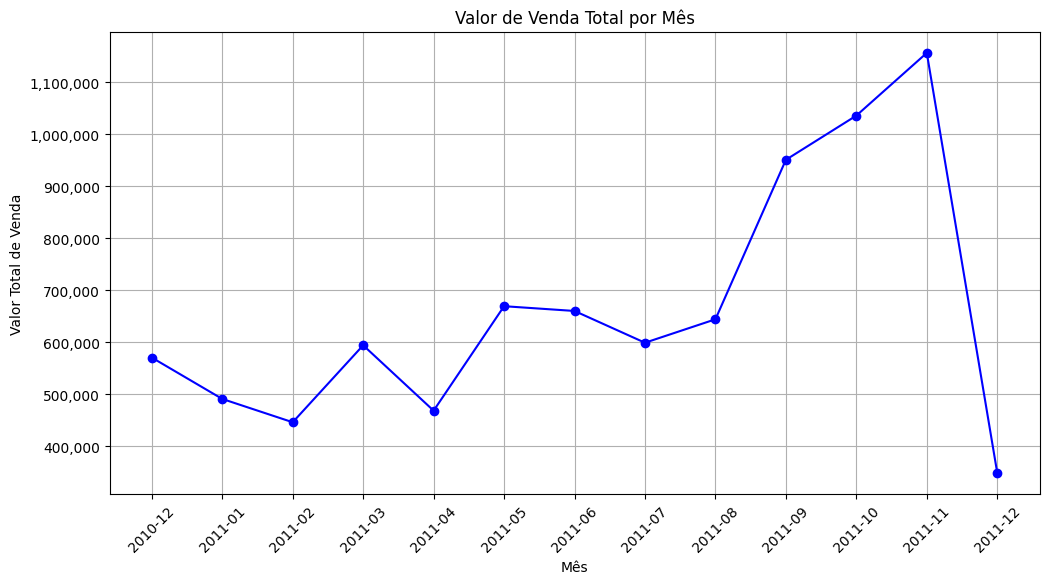

In [261]:
df = nao_nulo_sem_duplicatas.copy()

# Criando a coluna 'Ano_Mes' a partir de 'InvoiceDate'
df['Ano_Mes'] = df['InvoiceDate'].dt.to_period('M')

# Agrupando por mês e somando o 'preco_total'
venda_mensal = df.groupby('Ano_Mes')['preco_total'].sum().reset_index()

# Convertendo 'Ano_Mes' para string para exibição no eixo x
venda_mensal['Ano_Mes'] = venda_mensal['Ano_Mes'].astype(str)

# Plotando o gráfico
plt.figure(figsize=(12,6))
plt.plot(venda_mensal['Ano_Mes'], venda_mensal['preco_total'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel("Mês")
plt.ylabel("Valor Total de Venda")
plt.title("Valor de Venda Total por Mês")
plt.grid(True)

# Se preferir exibir o eixo y sem casas decimais (mesmo que os dados originais tenham decimais), use:
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()

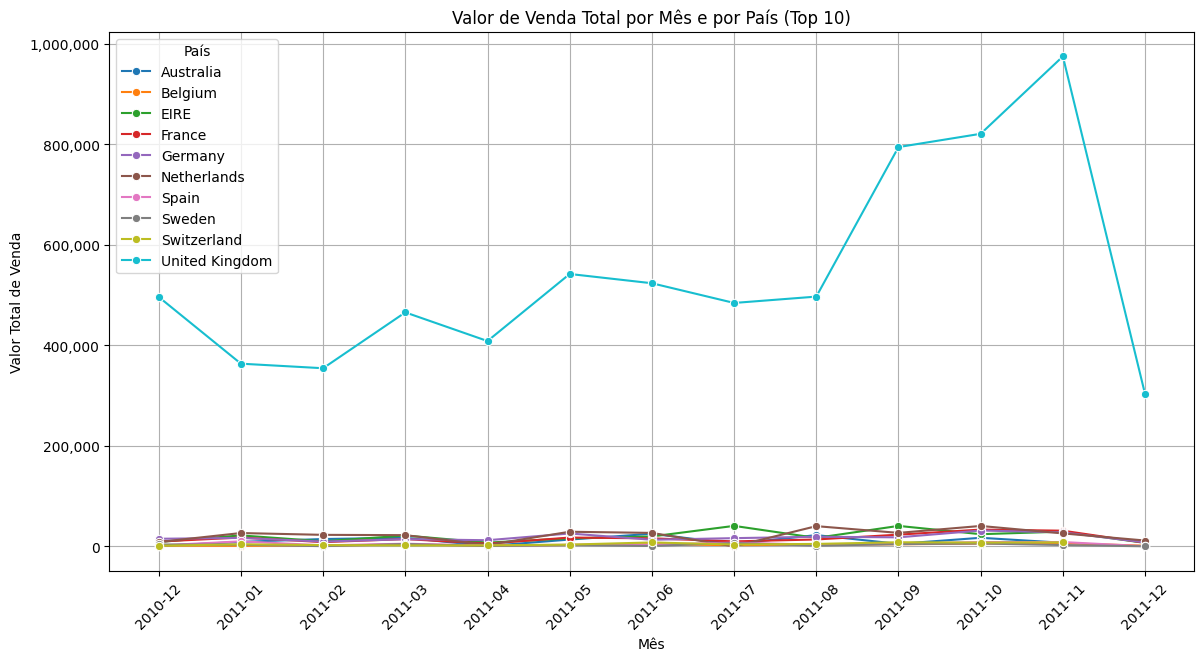

In [262]:
# Supondo que o DataFrame seja 'nao_nulo_sem_duplicatas'
df = nao_nulo_sem_duplicatas.copy()

# Converter a coluna InvoiceDate para período mensal
df['Ano_Mes'] = df['InvoiceDate'].dt.to_period('M')

# Calcular o total de vendas por país (para filtrar os top 10)
total_por_pais = df.groupby('Country')['preco_total'].sum().reset_index()

# Selecionar os top 10 países com maior valor total de vendas
top10_paises = total_por_pais.sort_values(by='preco_total', ascending=False).head(10)['Country']

# Filtrar o DataFrame para considerar somente os top 10 países
df_top10 = df[df['Country'].isin(top10_paises)]

# Agrupar por mês e país e calcular o total de vendas
venda_mensal_pais = df_top10.groupby(['Ano_Mes', 'Country'])['preco_total'].sum().reset_index()

# Converter o período para string para facilitar a plotagem no eixo x
venda_mensal_pais['Ano_Mes'] = venda_mensal_pais['Ano_Mes'].astype(str)

# Plotando o gráfico com Seaborn (linha para cada país)
plt.figure(figsize=(14,7))
sns.lineplot(data=venda_mensal_pais, x='Ano_Mes', y='preco_total', hue='Country', marker="o")

plt.xticks(rotation=45)
plt.xlabel("Mês")
plt.ylabel("Valor Total de Venda")
plt.title("Valor de Venda Total por Mês e por País (Top 10)")
plt.grid(True)

# Formatar o eixo y para não exibir casas decimais
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.legend(title="País")
plt.show()

# Etapa 10
## Calculo de RFM

### agrupe por cliente e pedido/compra para obter os dados e o preço total de pedidos

### em seguida agrupe por cliente para calcular o RFM
### R - Recência, diferença de dias da ultima compra do cliente e ultima compra disponivel no conjunto de dados que é o max() é 2011-12-09 12:50:00
### F - É  a frequencia ou seja quantidade de compras feitas pelo cliente
### M - ticket médio que é a média de compra feita pelo cliente

In [263]:
df = nao_nulo_sem_duplicatas.copy()

# Agrupar os dados por cliente e pedido (InvoiceNo) para obter a data e o preço total do pedido
order_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',    # Data do pedido (usamos 'max', pois geralmente são iguais)
    'preco_total': 'sum'     # Preço total do pedido
}).reset_index()

# Encontrar a data máxima de compra disponível no conjunto de dados
data_maxima = order_df['InvoiceDate'].max()

# Agrupar novamente apenas por cliente para calcular o RFM
rfm = order_df.groupby('CustomerID').agg({
    # Recência: diferença em dias entre a data máxima e a última compra do cliente
    'InvoiceDate': lambda x: (data_maxima - x.max()).days,
    # Frequência: quantidade de pedidos feitos pelo cliente
    'InvoiceNo': 'count',
    # Ticket médio (Monetário): média dos preços totais dos pedidos
    'preco_total': 'mean'
}).reset_index()

# Renomeando as colunas para o português
rfm.columns = ['ID_Cliente', 'Recencia', 'Frequencia', 'TicketMedio']

# Formatando o Ticket Médio para duas casas decimais
rfm['TicketMedio'] = rfm['TicketMedio'].round(2)

# Exibindo as primeiras linhas do resultado
print(rfm.head())

   ID_Cliente  Recencia  Frequencia  TicketMedio
0       12347         1           7       615.71
1       12348        74           4       449.31
2       12349        18           1      1757.55
3       12350       309           1       334.40
4       12352        35           8       313.26
